**Put any package imports you need in the below space**

In [139]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.neighbors import kneighbors_graph
import networkx as nx
from sklearn.metrics.pairwise import euclidean_distances, rbf_kernel
from scipy.linalg import eigvals as eigs
from numpy import linalg as LA
from sklearn.cluster import KMeans
%matplotlib inline

**Exercise 1**: Generating the data set. Generate a total of 60 points whose (x,y)-coordinates are drawn from a mixture of three Gaussians in a 2-dimentional real space. Each mixture has a mean of 2, 4, and 6, respectively, a standard deviation of one, and about 20 points.

1. Plot all the points in a single 2-dimensional space by using different shapes for each mixture.
2. Plot a histogram of all the points.

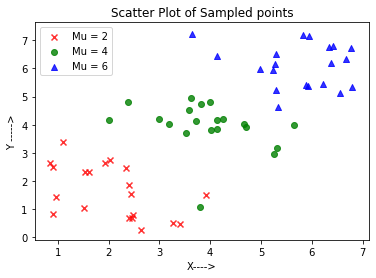

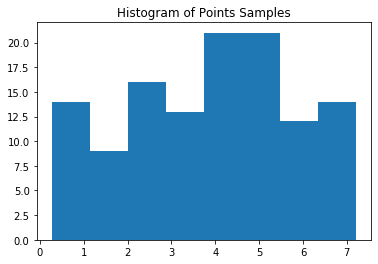

In [148]:
sigma = [[1, 0], [0, 1]] 
G2 = np.random.multivariate_normal([2,2], sigma, 20)
G4 = np.random.multivariate_normal([4,4], sigma, 20)
G6 = np.random.multivariate_normal([6,6], sigma, 20)

data = (G2, G4, G6)
colors = ("red", "green", "blue")
groups = ("Mu = 2", "Mu = 4", "Mu = 6")
Markers = ("x", "o", "^")
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
for data, color, group, marker in zip(data, colors, groups, Markers):
    ax.scatter(data[:,0], data[:,1], alpha=0.8, c=color, marker=marker, label=group)
plt.title('Scatter Plot of Sampled points')
plt.legend(loc=2)
plt.xlabel('X---->')
plt.ylabel('Y ----->')
plt.show()

union = np.concatenate((G2, G4, G6), axis=0)
array = union.flatten('F')
n_bins = 8
plt.hist(array, bins=n_bins)
plt.title("Histogram of Points Samples")
plt.show()

**Exercise 2**: Generating the similarity graphs. Write a script that generates the following similarity graphs for the data set in Exercise 1 (see Lecture Notes):

1. KNN: The K-nearest neighbor graph using the value of K=10. Plot the graph.
2. GK: The complete similarity graph using the Gaussian kernel with sigma=1 as similarity function. Plot the graph.


/home/vivekreddy/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/home/vivekreddy/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


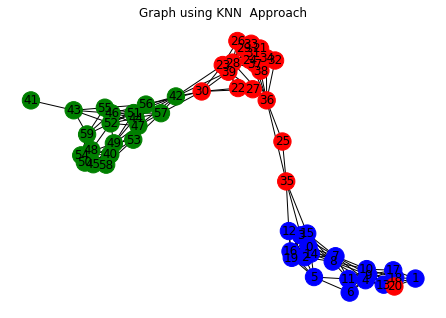

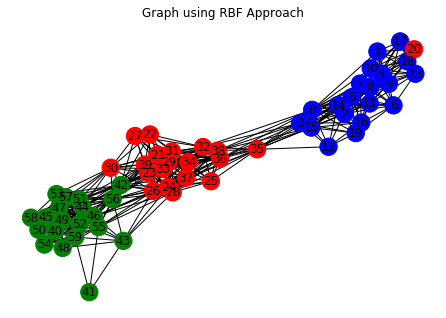

In [149]:
def symmetrify(A):
    A=A+A.transpose()
    vfunc = np.vectorize(lambda l: int(l>1))            
    return(vfunc(A))

color = ['r','g','b']
node_color = [color[int(i/20)-1] for i in range(0,60)]
A = kneighbors_graph(union, n_neighbors=10, mode='connectivity')
G_KNN = A.todense()
G_KNN = symmetrify(G_KNN)
np.fill_diagonal(G_KNN, 0)
G_KNN = nx.from_numpy_matrix(G_KNN)
fig = plt.figure()
nx.draw(G_KNN, with_labels=True, node_color=node_color)
plt.title("Graph using KNN  Approach")

G_RBF = rbf_kernel(union, union, gamma=0.5)
t_hold = 0.16
vfunc = np.vectorize(lambda l: int(l>t_hold))
G_RBF = vfunc(G_RBF)
np.fill_diagonal(G_RBF, 0)
G_RBF = nx.from_numpy_matrix(G_RBF)
fig = plt.figure()
nx.draw(G_RBF, with_labels=True, node_color=node_color)
plt.title("Graph using RBF Approach")
plt.show()

**Exercise 3**: Characterizing the graph spectra. Write a script that generates the graph Laplacian matrix L = D - A and the normalized graph Laplacian matrix $\hat{L} = I - \hat{A}$ and calculates the graph spectra for each of the graphs in Exercise 2.

Plot each graph's eigenspectra as a separate figure with i as x-axis and $\lambda_i$ as y-axis (four lines).


Smallest 5 eigen values for G_KNN_L are:  
[4.85722573e-17 4.85478540e-02 2.65929569e-01 7.87088784e-01
 9.79361781e-01]


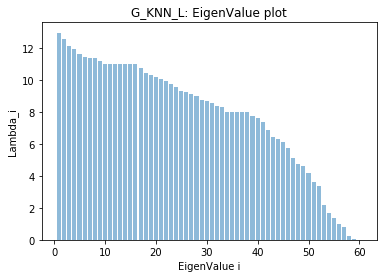

Smallest 5 eigen values for G_KNN_NL are:  
[-5.20417043e-17  6.12110837e-03  3.37465922e-02  1.32075004e-01
  2.31220365e-01]


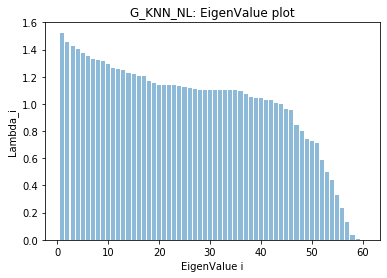

Smallest 5 eigen values for G_RBF_L are:  
[-1.11022302e-15  5.29190049e-01  2.61226831e+00  3.23220182e+00
  4.84055447e+00]


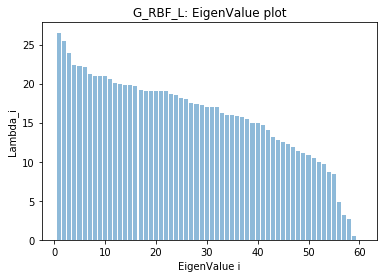

Smallest 5 eigen values for G_RBF_NL are:  
[-1.04083409e-16  3.68806206e-02  1.82982053e-01  4.33284339e-01
  6.47866482e-01]


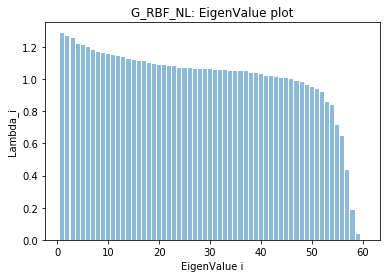

In [150]:
def plot_eigs(n, name, k=5): 
    n_val = -np.sort(-np.real(eigs(n.todense()))) #Uncomment below line if you want the graph to be sorted in Descending order
    #n_val = np.sort(np.real(eigs(n.todense())))
    print("Smallest {} eigen values for {} are:  ".format(k, name))
    print(np.sort(n_val[60-k:]))
    plt.bar(range(1, n_val.shape[0]+1), n_val, align='center', alpha=0.5)
    plt.xlabel('EigenValue i')
    plt.ylabel('Lambda_i')
    plt.title('{}: EigenValue plot'.format(name))
    plt.show()
    return n_val

G_KNN_L = nx.laplacian_matrix(G_KNN)
G_KNN_L_eig = plot_eigs(G_KNN_L, "G_KNN_L")
G_KNN_NL = nx.normalized_laplacian_matrix(G_KNN)
G_KNN_NL_eig = plot_eigs(G_KNN_NL, "G_KNN_NL")

G_RBF_L = nx.laplacian_matrix(G_RBF)
G_RBF_L_eig = plot_eigs(G_RBF_L, "G_RBF_L")
G_RBF_NL = nx.normalized_laplacian_matrix(G_RBF)
G_RBF_NL_eig = plot_eigs(G_RBF_NL, "G_RBF_NL")

*What do you observe about the multiplicity of the "close to" zero eigenvalues? Are your observations consistent with the Properties described in lecture notes?*

Ans: 
1) For the Laplacian plots, the multiplicity of zero is one, since there aren't any disconnected components in the graphs plotted in Ex 2.

2) For Normalized Laplacian Plots: The values satisfy property 2 given in the lecture notes, i.e. 0=Lambda_1<Lambda_n<2 where Lambda_n > .... > Lambda_1. 

3) Since clearly we have 3 ground truth clusters, the second smallest eigen value is small enough to verify the existense of a community.



Plot each graph's eigenvector plot for the eigenvector u corresponding to the second smallest eigenvalue, with i as x-axis and u_i vector component as y-axis.

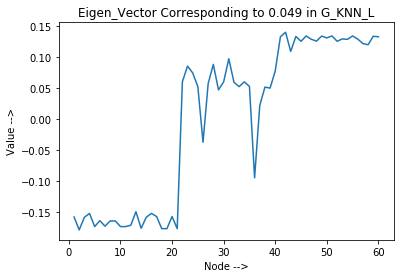

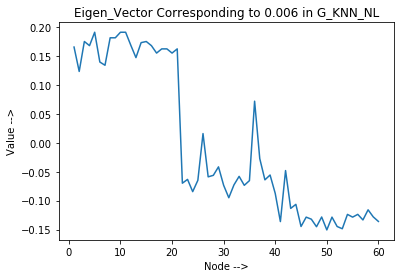

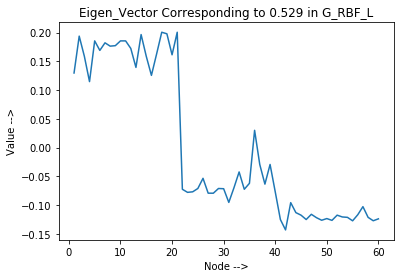

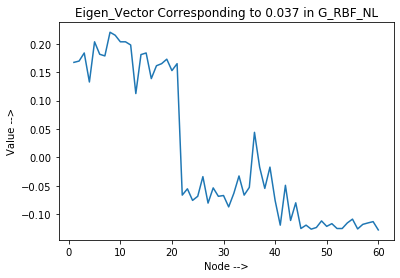

In [154]:
def eig_vector(A, name):
    values, Vec = LA.eig(A)
    indices = np.argsort(values)
    #print(values[indices[1]])
    vector = Vec[:,indices[1]]
    plt.plot(range(1,len(values)+1), vector)
    plt.title("Eigen_Vector Corresponding to {} in {}".format(round(values[indices[1]],3), name))
    plt.xlabel("Node -->")
    plt.ylabel("Value -->")
    plt.show()
    return vector

G_KNN_L_vec = eig_vector(G_KNN_L.todense(), "G_KNN_L")
G_KNN_NL_vec = eig_vector(G_KNN_NL.todense(), "G_KNN_NL")
G_RBF_L_vec = eig_vector(G_RBF_L.todense(), "G_RBF_L")
G_RBF_NL_vec = eig_vector(G_RBF_NL.todense(), "G_RBF_NL")

*If you were using this plot for 2-way graph partitioning into S and V-S, the points from which mixtures will end up in which partition?*

Only giving this for one iteration:
Points 0-20 will come in S and 21-60 will come in V-S. This hold true from inferring any of the plots above

Calculate the conductance (write the script) for each of the identified partitions, S and V-S for the KNN graph using both the normalized and unnormalized Laplacian. Also, calculate the lower and upper bounds for the graph conductance using the inequalities provided in the lecture notes. Print the results of these calculations (make sure to label them).

In [162]:
print("The Calculation of conductance uses the Adjacency matrix of Graph generated by KNN and identified partitions")
def conductance(A, N_range=20):
    M_s = np.sum(A[0:N_range,0:N_range])/2
    C_s = np.sum(A[0:N_range,N_range:])
    return C_s/(2*C_s+M_s)

print("\n")
print("For normalized KNN and un-normalized KNN, the Identified S is the set of firt 20 values")
print("The Conductance is equal to {}".format(conductance(A, 20))) #

Lambda_2 = G_KNN_NL_eig[-2]
print("Lower_Bound for Conductance is given by {}".format(Lambda_2/2))
print("Upper_Bound for Conductance is given by {}".format(np.sqrt(2*Lambda_2)))

The Calculation of conductance uses the Adjacency matrix of Graph generated by KNN and identified partitions


For normalized KNN and un-normalized KNN, the Identified S is the set of firt 20 values
The Conductance is equal to 0.0944206008583691
Lower_Bound for Conductance is given by 0.0030605541874692273
Upper_Bound for Conductance is given by 0.11064455137907564


**Exercise 4**: Spectral graph clustering. Write a script that performs spectral graph clustering using the normalized graph Laplacian of each of the graph in Exercise 2. The pseudo-code of the clustering method is described in the lecture notes. For the k-means clustering method use the value of k=3. Run the spectral graph clustering and plot the corresponding points in Ex.1 with the shapes based on the identified cluster (one plot for each graph). In addition, run the k-means clustering algorithm on the data set in Exercise 1, using the Euclidean distance as the dissimilarity metric, and the value of k=3. Plot these results in 2-dimensional space but use different shape for each of the identified cluster. You should have three plots: two for each graph using spectral clustering, and one for k-means on the original data.

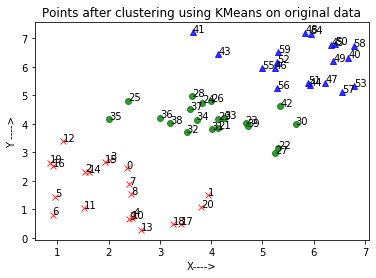

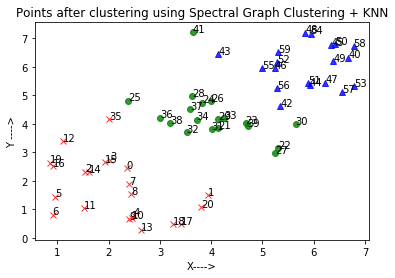

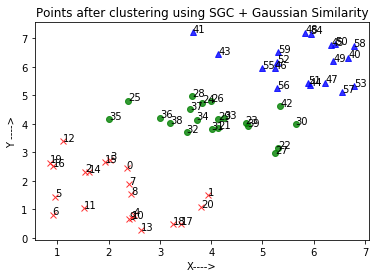

In [175]:
def eig_vectors(A, k): #K:=> Number pf Eigen Vectors
    values, Vec = LA.eig(A)
    indices = np.argsort(values)
    Eig_matrix = np.zeros((A.shape[0],k))
    for i in range(0,k-1):
        Eig_matrix[:,i] = Vec[:,indices[i]].transpose()
    return Eig_matrix

def Fit_plot_clusters(data, G, name):
    pred = KMeans(n_clusters=3).fit_predict(G)
    
    colors = {pred[0]:"red", pred[26]:"green", pred[59]:"blue"}
    groups = {"x":"Cluster {}".format(pred[0]),"o":"Cluster {}".format(pred[26]),"^":"Cluster {}".format(pred[59])}
    Markers = {pred[0]:"x", pred[26]:"o", pred[59]:"^"}
    c=[colors[i] for i in pred] 
    m=[Markers[i] for i in pred]
    for i in range(0,60):
        plt.plot(data[i,0],data[i,1], alpha=0.8, c=c[i], marker=m[i])
        plt.annotate(str(i), (data[i,0],data[i,1]))
    plt.title('Points after clustering using {}'.format(name))
    #plt.legend(handles=groups, loc=2)
    plt.xlabel('X---->')
    plt.ylabel('Y ---->')
    plt.show()
    return None

G_KNN_NL_EM =  eig_vectors(G_KNN_NL.todense(), 3)
G_RBF_NL_EM = eig_vectors(G_RBF_NL.todense(), 4)
Fit_plot_clusters(union,union,"KMeans on original data")
Fit_plot_clusters(union,G_KNN_NL_EM,"Spectral Graph Clustering + KNN")
Fit_plot_clusters(union,G_RBF_NL_EM,"SGC + Gaussian Similarity")